In [16]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data_1 = pd.read_csv('clustering_1.csv', delimiter='\t')
data_2 = pd.read_csv('clustering_2.csv')
data_3 = pd.read_csv('clustering_3.csv')
data = ['clustering_1.csv', 'clustering_2.csv', 'clustering_3.csv']

clustering_1.csv


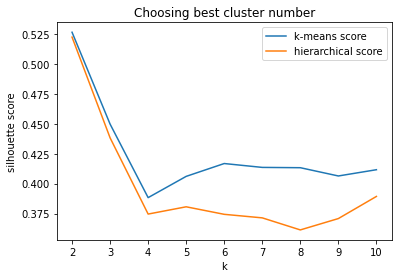

clustering_2.csv


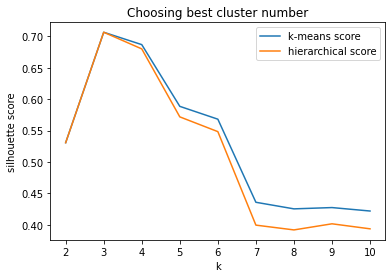

clustering_3.csv


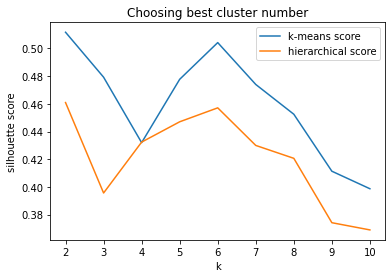

In [26]:
files = ['clustering_1.csv', 'clustering_2.csv', 'clustering_3.csv']

for f in files:
    data = pd.read_csv(f, delimiter='\t')
    print(f)
    
    kmeans_score = []
    hierarchical_score = []
    
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k).fit(data)
        hier = AgglomerativeClustering(n_clusters=k).fit(data)
        
        kmeans_score.append(silhouette_score(data, kmeans.labels_, metric='euclidean'))
        hierarchical_score.append(silhouette_score(data, hier.labels_, metric='euclidean'))
    
    plt.plot(range(2, 11), kmeans_score, label='k-means score')
    plt.plot(range(2, 11), hierarchical_score, label='hierarchical score')
    plt.legend(loc='best')
    plt.title('Choosing best cluster number')
    plt.xlabel('k')
    plt.ylabel('silhouette score')
    plt.show()

clustering_1.csv


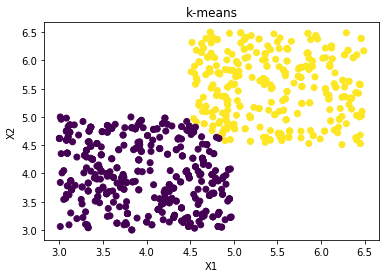

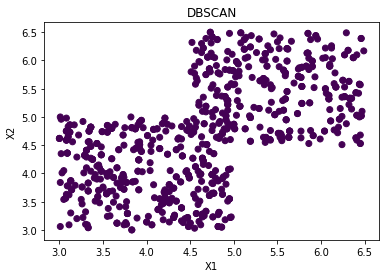

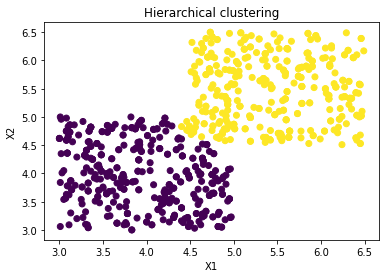

clustering_2.csv


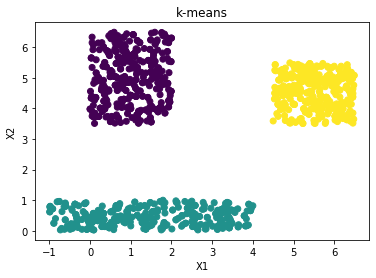

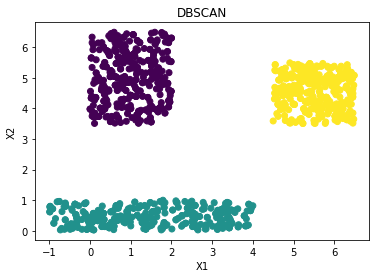

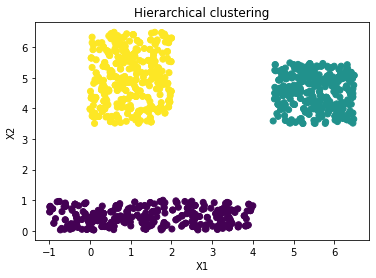

clustering_3.csv


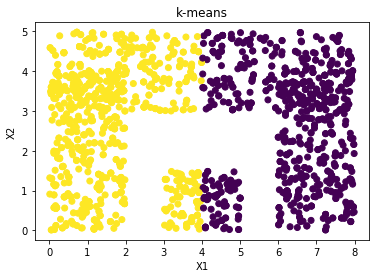

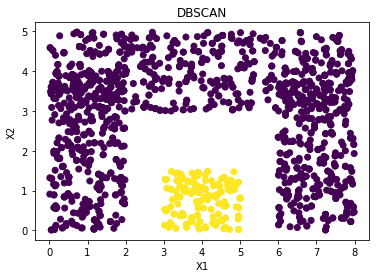

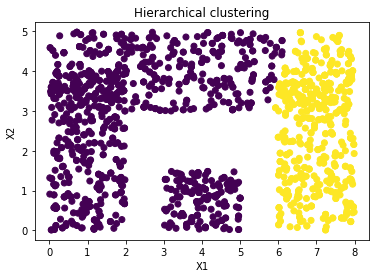

In [15]:
clusters = [2, 3, 2]

for f, c in zip(files, clusters):
    data = pd.read_csv(f, delimiter='\t')
    print(f)
    estimators = (
        ('k-means', KMeans(n_clusters=c)),
        ('DBSCAN', DBSCAN()),
        ('Hierarchical clustering', AgglomerativeClustering(n_clusters=c))
    )
    
    for title, est in estimators:
        est.fit(data)
        
        plt.scatter(data.to_numpy()[:, 0], data.to_numpy()[:, 1], c=est.labels_)
        plt.title(title)
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.show()